In [4]:
import numpy as np

In [15]:
def euclidian_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

def most_common(y):
    d={}
    for p in y:
        d[p] = 1 + d.get(p,0)

    mx_f = -1
    mx_v = -1

    for v,f in d.items():
        if mx_f < f:
            mx_f = f
            mx_v = v

    return mx_v

In [20]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self,x):
        # Compute distance with other points
        distances = [euclidian_distance(x,x_train) for x_train in self.X_train]
        
        # Select k closest points
        closest_points = np.argsort(distances)[:self.k]
        
        # Go with majority vote
        y_points = [self.y_train[point] for point in closest_points]
        return most_common(y_points)
          

In [22]:
model = KNN()

model.fit([1,2,3,4,10,11,12,13,14] , [1,1,1,1,0,0,0,0,0])
model.predict([1,2,20])

[1, 1, 0]

## Test on Iris Dataset

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

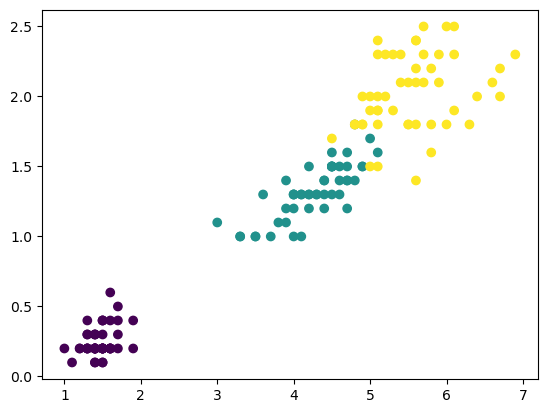

In [29]:
plt.scatter(X[:,2], X[:,3], c=y)
plt.show()

In [34]:
model = KNN()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [35]:
predictions

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0]

In [ ]:
acc = np.sum(predictions == y_test) / len(x_test) * 100